# Numpy

## Датасет Ирис

### 1. Чтение датасета Ирис

In [8]:
# импортируем библиотеки
import numpy as np

# читаем датасет
iris = np.genfromtxt('iris.csv', delimiter=',', dtype=float, skip_header=1)

print(f"Первые несколько строк датасета:\n{iris[:10, :]}")

Первые несколько строк датасета:
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]]


### 2. Представление датасета в виде одномерного/двумерного массивов

In [9]:
# преобразуем в двумерный массив
X = iris[:, :4]  # признаки
# преобразуем в одномерный массив
y = iris[:, 4]   # названия ирисов

print(f"Первые несколько строк матрицы признаков:\n{X[:10]}\n")
print(f"Первые несколько элементов вектора названий ириса:\n{y[:10]}\n")
# выведем занимаемое место
print("Размерность матрицы признаков:", X.shape)
print("Размерность вектора названий:", y.shape)
print(f"Занимаемое матрицей признаков место: {X.nbytes} байт")
print(f"Занимаемое вектором названий место: {y.nbytes} байт")

Первые несколько строк матрицы признаков:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Первые несколько элементов вектора названий ириса:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Размерность матрицы признаков: (150, 4)
Размерность вектора названий: (150,)
Занимаемое матрицей признаков место: 4800 байт
Занимаемое вектором названий место: 1200 байт


### 3. Нормализация данных

In [10]:
# найдем минимальный и максимальный по столбцам элемент
X_min = X.min(axis=0)
X_max = X.max(axis=0)

# Нормализуем данные на промежуток от 0 до 1 для каждой колонки
X_norm = (X - X_min) / (X_max - X_min)

print("Первые несколько строк нормализированной "
      f"матрицы признаков:\n{X_norm[:10]}")

Первые несколько строк нормализированной матрицы признаков:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


### 4. Представление признака в виде категориальной переменной

Возьмем первый признак и представим его в виде категориальной переменной

In [11]:
# первый признак
x = X_norm[:, 0]
# квантили для создания категорий
quantiles = np.quantile(x, [0.25, 0.75])
categories = np.where(x < quantiles[0], 'small',
                      np.where(x <= quantiles[1], 'medium', 'big'))

print(f"Первые несколько категорий первого признака:\n{categories[:10]}")

Первые несколько категорий первого признака:
['medium' 'small' 'small' 'small' 'small' 'medium' 'small' 'small' 'small'
 'small']


### 5. Разделение датасета на две случайные выборки (0.8 / 0.2)

In [ ]:
np.random.seed(42)

# переставим индексы в случайном порядке
indices = np.random.permutation(len(X_norm))
split_index = int(len(X_norm) * 0.8)

# разделим на обучающую и тестовую выборки
X_train = X_norm[indices[:split_index]]
y_train = y[indices[:split_index]]
X_test = X_norm[indices[split_index:]]
y_test = y[indices[split_index:]]

# выведем размеры обучающей и тестовой выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 120
Размер тестовой выборки: 30


## Модель

### 1. Обучение модели
Возьмем метод классификации SVC и создадим и обучим модель

In [ ]:
# импортируем библиотеки
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
# обучим модель
model.fit(X_train, y_train)

# используем тестовую выборку
y_pred = model.predict(X_test)

# оценим точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.9666666666666667


#### Вывод
Точность данной модели высокая, поэтому можно сделать вывод, что она хорошо обучилась

### 2. Эксперименты

- Ненормализованные данные

Обучим модель на ненормализованных данных 

In [71]:
# первый эксперимент
# вычисляем ненормализованные данные
X_train_unnorm = X_train * (X_max - X_min) + X_min
X_test_unnorm = X_test * (X_max - X_min) + X_min

# обучаем
model_unnorm = SVC()
model_unnorm.fit(X_train_unnorm, y_train)

y_pred_unnorm = model_unnorm.predict(X_test_unnorm)

# вычисляем точность модели
accuracy_unnorm = accuracy_score(y_test, y_pred_unnorm)
print(f"Точность модели: {accuracy_unnorm}")

Точность модели: 0.9666666666666667


#### Вывод
Точность модели не изменилась по сравнению с точностью модели, обученной на нормализованных данных, что свидетельствует о ее низкой в данном случае чувствительности к нормализации. Скорее всего это связано с тем, что числовые значения в датасете принадлежали к некоторому узкому диапазону изначально

- Изменение параметра регуляризации С

Значение по умолчанию для параметра C -- 1.0

Уменьшим силу регуляризации, увеличим это значение 

In [72]:
model_c = SVC(C=10.0)

# обучим модель
model_c.fit(X_train, y_train)
y_pred_c = model_c.predict(X_test)

# оценим точность модели
accuracy_c = accuracy_score(y_test, y_pred_c)
print(f"Точность модели: {accuracy_c}")

Точность модели: 1.0


#### Вывод
Увеличение параметра C привело к увеличению точности модели, что свидетельствует о лучшей классификации тренировочной выборки, однако чрезмерное увеличение может привести к переобучению модели

- Использование другого ядра 

По умолчанию используется ядро `rbf`

Заменим его на `linear`

In [74]:
model_kernel = SVC(kernel='linear')

# обучим модель
model_kernel.fit(X_train, y_train)
y_pred_kernel = model_kernel.predict(X_test)

# оценим точность модели
accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
print(f"Точность модели: {accuracy_kernel}")

Точность модели: 0.9666666666666667


#### Вывод
При использовании ядра `linear` точность модели не изменилась и осталась высокой, что говорит о простоте задачи классификации объектов и хорошем разделении классов

## Визуализация
### 1. Визуализация с помощью метода уменьшения размерности `PCA`

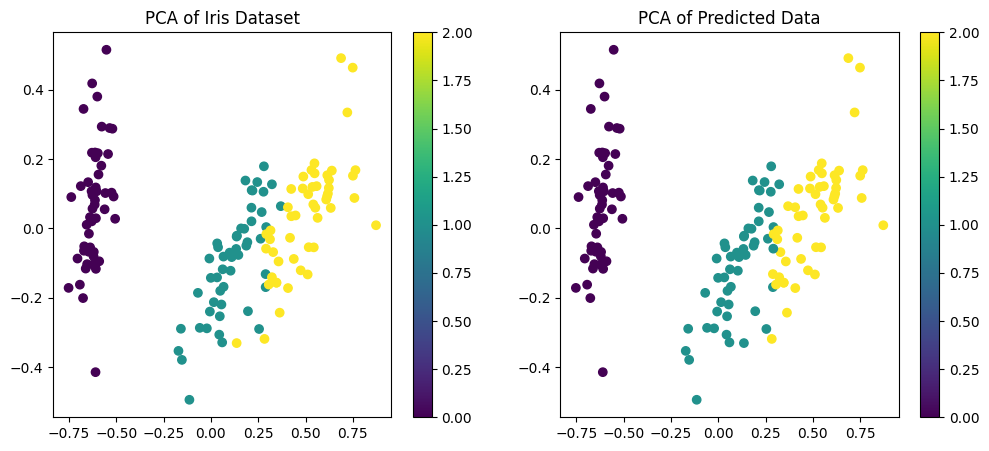

In [ ]:
# импортируем библиотеки
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# применим PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# визуализация с оригинальными данными
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA of Iris Dataset')
plt.colorbar()

# визуализация с предсказанными данными
# найдем предсказанные данные
y_pred_norm = model.predict(X_norm)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_norm)
plt.title('PCA of Predicted Data')
plt.colorbar()
plt.show()

### 2. Визуализация с помощью метода уменьшения размерности `t-SNE`

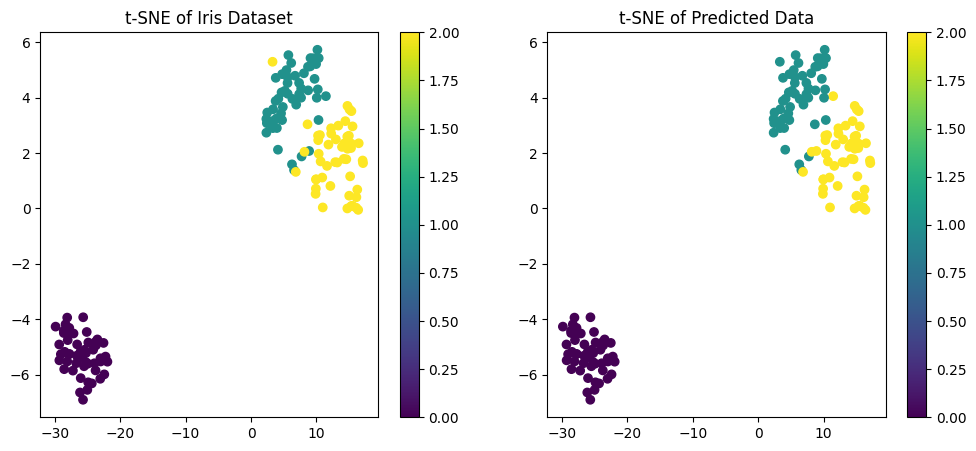

In [75]:
# применим t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_norm)

# визуализация с оригинальными данными
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE of Iris Dataset')
plt.colorbar()

# визуализация с предсказанными данными
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_norm)
plt.title('t-SNE of Predicted Data')
plt.colorbar()
plt.show()